In [41]:
# Getting the modules...
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib
import os
from sklearn.feature_extraction import DictVectorizer

print('Imported modules completed')

Imported modules completed


In [2]:
dir_path = '../01-intro/data/'
file_list = os.listdir(dir_path)
print(file_list)

['.ipynb_checkpoints', 'yellow_tripdata_2023-01.parquet', 'yellow_tripdata_2023-02.parquet']


In [3]:
# 1st Question, how many columns does the data have for January 2023?
filename1 = f'{dir_path}{file_list[1]}'
df = pd.read_parquet(filename1)
print(f'The Dataset from January has:\n Rows: {df.shape[0]}\n Columns: {df.shape[1]}')

The Dataset from January has:
 Rows: 3066766
 Columns: 19


In [4]:
# 2nd Question, Calculate duration of trip in minutes....
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2023-01-01 00:32:10,2023-01-01 00:40:36
1,2023-01-01 00:55:08,2023-01-01 01:01:27
2,2023-01-01 00:25:04,2023-01-01 00:37:49
3,2023-01-01 00:03:48,2023-01-01 00:13:25
4,2023-01-01 00:10:29,2023-01-01 00:21:19


In [27]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [28]:
df['duration'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() /60, 3)
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duration']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,duration
0,2023-01-01 00:32:10,2023-01-01 00:40:36,8.433
1,2023-01-01 00:55:08,2023-01-01 01:01:27,6.317
2,2023-01-01 00:25:04,2023-01-01 00:37:49,12.750
3,2023-01-01 00:03:48,2023-01-01 00:13:25,9.617
4,2023-01-01 00:10:29,2023-01-01 00:21:19,10.833


In [29]:
df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
1839180,1,2023-01-20 13:35:00,2023-01-20 13:05:48,1.0,0.8,99.0,N,227,14,1,16.5,0.0,0.5,0.0,0.0,1.0,18.0,0.0,0.0,-29.200
2124414,1,2023-01-23 10:43:58,2023-01-23 10:29:26,1.0,2.4,99.0,N,102,82,1,21.5,0.0,0.5,0.0,0.0,1.0,23.0,0.0,0.0,-14.533
2218504,1,2023-01-24 11:00:00,2023-01-24 10:40:48,1.0,0.4,99.0,N,247,169,1,15.5,0.0,0.5,0.0,0.0,1.0,17.0,0.0,0.0,-19.200


In [30]:
df[df['tpep_dropoff_datetime'].isna() | df['tpep_pickup_datetime'].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration


In [34]:
# Standard Deviation including the cases where pick up time occured later than dropoff time
duration_std = df['duration'].std()
# Filtering the edge casese where pickup time > dropoff time
df_filtered = df[df['tpep_pickup_datetime'] <= df['tpep_dropoff_datetime']]
print(f'Filtered size: {len(df_filtered)}\nUnfiltered size: {len(df)}')
duration_std_filter = df_filtered['duration'].std()
print(f'\nDuration (without filter std [min]: {duration_std}\nDuration (with filter std [min]: {duration_std_filter}\n')

Filtered size: 3066763
Unfiltered size: 3066766

Duration (without filter std [min]: 42.59435142789921
Duration (with filter std [min]: 42.594356410027174



In [6]:
from datetime import timedelta
tmf = '%Y-%m-%d %H:%M:%S'
timestamp_1 = datetime.strptime('2023-01-01 00:32:10', tmf)
timestamp_2 = datetime.strptime('2023-01-01 00:40:36', tmf)
print(f'Delta with t2-t1: {timestamp_2-timestamp_1}')
print(f'Delta with t2-t1 in minutes: {round((timestamp_2-timestamp_1).total_seconds()/60,2)}')

Delta with t2-t1: 0:08:26
Delta with t2-t1 in minutes: 8.43


C:\Users\Martin V\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

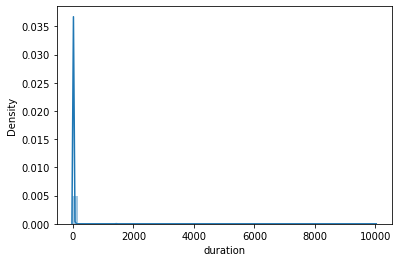

In [39]:
sns.distplot(df['duration'])

In [40]:
# 3. Dropping Outliers.
df_trimmed = df[(df['duration'] > 1) & (df['duration']<= 60)]
print(f' Percentage of records left: {len(df_trimmed)/len(df)}')


 Percentage of records left: 0.9811286547457485


In [45]:
# 4. One hot enconding for pickup location.
categorical = ['PULocationID', 'DOLocationID']
df_trimmed[categorical] = df_trimmed[categorical].astype(str)
train_dicts = df_trimmed[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

C:\Users\Martin V\AppData\Local\Temp\ipykernel_2964\3740858867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed[categorical] = df_trimmed[categorical].astype(str)


In [47]:
X_train.shape

(3008892, 515)